Basedo no ViralML e um pouco do estudo do Pardini

Usa um dataset de preços desde 2010 (pix2)

Aqui foi utilizado a biblioteca **\_markov_setup.py**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import logging
log = logging.getLogger(__name__)
# logging.basicConfig(level=logging.DEBUG) 

In [8]:
import importlib, sys, os
from pathlib import Path
sys.path.append( str( Path(os.path.abspath('')).parents[0] ) )

E:\Projetos\ITA_Tese


In [9]:
# 
import markov._markov_setup as _markov_setup
from support_library.jupyter_plus import *

_ = importlib.reload(sys.modules['markov._markov_setup'])

# Setup

In [16]:
RANDOM_SIZE = 1000000
RANDOM_SIZE = 10030

QTD_BINS = 3


TEST_SIZE = 0.05

# DataCollect

In [17]:
df_master = pd.read_csv("pix2.csv")
df = df_master.rename(columns = {'PIX_CHINA_BHKP_NET_USDT':'bhkp_price', 
                          'PIX_CHINA_NBSK_NET_USDT':'nbkp_price', 
                           'CHINA_BHKP_PIX_PRICE':'bhkp_price',
                          "DATE":'date'})

df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.isocalendar().week


df['bhkp_delta'] = df['bhkp_price'].diff()
df['bhkp_delta_outcome'] = df['bhkp_price'].diff(-1) * -1
df['bhkp_variation'] = df['bhkp_price'].pct_change()

df['Outcome'] = (df['bhkp_price'].shift(-1) - df['bhkp_price'])
df

,date,bhkp_price,year,week,bhkp_delta,bhkp_delta_outcome,bhkp_variation,Outcome
0,2010-01-05,662.09,2010,1,NaN,21.66,NaN,21.66
1,2010-01-12,683.75,2010,2,21.66,2.10,0.032715,2.10
2,2010-01-19,685.85,2010,3,2.10,5.29,0.003071,5.29
3,2010-01-26,691.14,2010,4,5.29,3.79,0.007713,3.79
4,2010-02-02,694.93,2010,5,3.79,23.50,0.005484,23.50
...,...,...,...,...,...,...,...,...
623,2021-12-31,576.42,2021,52,5.69,11.76,0.009970,11.76
624,2022-01-07,588.18,2022,1,11.76,5.11,0.020402,5.11
625,2022-01-14,593.29,2022,2,5.11,7.15,0.008688,7.15
626,2022-01-21,600.44,2022,3,7.15,2.38,0.012051,2.38


In [18]:
print(df.shape)
print(df.dtypes)
df.head()

(628, 8)
date                  datetime64[ns]
bhkp_price                   float64
year                           int64
week                          UInt32
bhkp_delta                   float64
bhkp_delta_outcome           float64
bhkp_variation               float64
Outcome                      float64
dtype: object


,date,bhkp_price,year,week,bhkp_delta,bhkp_delta_outcome,bhkp_variation,Outcome
0,2010-01-05,662.09,2010,1,NaN,21.66,NaN,21.66
1,2010-01-12,683.75,2010,2,21.66,2.10,0.032715,2.10
2,2010-01-19,685.85,2010,3,2.10,5.29,0.003071,5.29
3,2010-01-26,691.14,2010,4,5.29,3.79,0.007713,3.79
4,2010-02-02,694.93,2010,5,3.79,23.50,0.005484,23.50


In [19]:
df.describe()

,bhkp_price,year,week,bhkp_delta,bhkp_delta_outcome,bhkp_variation,Outcome
count,628.000000,628.000000,628.000000,627.000000,627.000000,627.000000,627.000000
mean,636.316481,2015.544586,26.353503,-0.094530,-0.094530,-0.000056,-0.094530
std,101.204946,3.488818,15.109886,8.696082,8.696082,0.013797,8.696082
min,441.260000,2010.000000,1.000000,-58.140000,-58.140000,-0.078251,-58.140000
25%,574.947500,2013.000000,13.000000,-2.420000,-2.420000,-0.003861,-2.420000
50%,645.270000,2016.000000,26.000000,0.000000,0.000000,0.000000,0.000000
75%,703.867500,2019.000000,39.000000,2.500000,2.500000,0.003951,2.500000
max,846.880000,2022.000000,53.000000,97.260000,97.260000,0.157578,97.260000


# Markov

## Random Sets
- **Outcome_Next_Day_Direction**: Resultado Direção do dia seguinte

In [20]:
# from markov._markov_setup import *
import markov._markov_setup as _markov_setup
_ = importlib.reload(sys.modules['markov._markov_setup'])

In [21]:
# %time my_set = _markov_setup.get_random_sets(df, 2, \
#                                              columns=['bhkp_price', 'bhkp_delta', 'bhkp_variation', 'nbkp_price', 'nbkp_delta', 'nbkp_variation'], \
#                                              outcomes=['bhkp_price', 'bhkp_delta', 'bhkp_variation'])


%time my_set = _markov_setup.get_random_sets(df, RANDOM_SIZE, \
                                             columns=['bhkp_price','nbkp_price'], \
                                             outcomes=['bhkp_price', 'nbkp_price'], \
                                             bypass=[])

get_random_sets:   0%|▏                                                 | 34/10030 [00:00<00:29, 333.33it/s]

row_set: 0      | row_quant: 27 | rows:    441-467    | market_subset:  (27, 8)   | Close_Date: 01/02/2019


get_random_sets:  20%|██████████▏                                       | 2055/10030 [00:06<00:26, 296.12it/s]

row_set: 2006   | row_quant: 20 | rows:     56-75     | market_subset:  (20, 8)   | Close_Date: 06/14/2011


get_random_sets:  40%|████████████████████                              | 4032/10030 [00:12<00:18, 323.94it/s]

row_set: 4012   | row_quant: 23 | rows:    356-378    | market_subset:  (23, 8)   | Close_Date: 04/18/2017


get_random_sets:  60%|██████████████████████████████▏                   | 6049/10030 [00:19<00:13, 302.96it/s]

row_set: 6018   | row_quant: 17 | rows:    423-439    | market_subset:  (17, 8)   | Close_Date: 06/19/2018


get_random_sets:  81%|████████████████████████████████████████▎         | 8077/10030 [00:26<00:06, 322.46it/s]

row_set: 8024   | row_quant: 18 | rows:    562-579    | market_subset:  (18, 8)   | Close_Date: 02/26/2021


get_random_sets: 100%|██████████████████████████████████████████████████| 10030/10030 [00:32<00:00, 312.22it/s]

CPU times: total: 35 s
Wall time: 32.2 s


In [24]:
%time df1 = _markov_setup.convet_collection_to_dataframe(my_set)
df1

CPU times: total: 875 ms
Wall time: 956 ms


,Sequence_ID,Close_Date,ref_date,bhkp_price,bhkp_price_variation,bhkp_price_outcome
442,0,2019-01-02,2018-07-10,770.06,0.000793,-0.76
443,0,2019-01-02,2018-07-17,769.30,-0.000987,0.11
444,0,2019-01-02,2018-07-24,769.41,0.000143,-0.83
445,0,2019-01-02,2018-07-31,768.58,-0.001079,0.81
446,0,2019-01-02,2018-08-07,769.39,0.001054,0.97
...,...,...,...,...,...,...
51,10029,2011-02-01,2010-12-28,742.71,-0.003382,0.15
52,10029,2011-02-01,2011-01-04,742.86,0.000202,0.80
53,10029,2011-02-01,2011-01-11,743.66,0.001077,0.15
54,10029,2011-02-01,2011-01-18,743.81,0.000202,-0.41


In [25]:
file_name = f'step_001_pix2_{RANDOM_SIZE}'
_markov_setup.export_dataframe(df1, file_name)

In [26]:
df2 = _markov_setup.import_dataframe(file_name)
df2

,Sequence_ID,Close_Date,ref_date,bhkp_price,bhkp_price_variation,bhkp_price_outcome
442,0,2019-01-02,2018-07-10,770.06,0.000793,-0.76
443,0,2019-01-02,2018-07-17,769.30,-0.000987,0.11
444,0,2019-01-02,2018-07-24,769.41,0.000143,-0.83
445,0,2019-01-02,2018-07-31,768.58,-0.001079,0.81
446,0,2019-01-02,2018-08-07,769.39,0.001054,0.97
...,...,...,...,...,...,...
51,10029,2011-02-01,2010-12-28,742.71,-0.003382,0.15
52,10029,2011-02-01,2011-01-04,742.86,0.000202,0.80
53,10029,2011-02-01,2011-01-11,743.66,0.001077,0.15
54,10029,2011-02-01,2011-01-18,743.81,0.000202,-0.41


In [27]:
red('me pegunto se é efetivo criar o tal do random sets... quando aplico o groupby quase que volta ao tamanho original... mas vamos ver no que vai dar')

df2.groupby(['ref_date','bhkp_price', 'bhkp_price_variation','bhkp_price_outcome']).count()
# df2.groupby(['ref_date']).count()

<span style='color:red'>me pegunto se é efetivo criar o tal do random sets... quando aplico o groupby quase que volta ao tamanho original... mas vamos ver no que vai dar</span>

,,,,Sequence_ID,Close_Date
ref_date,bhkp_price,bhkp_price_variation,bhkp_price_outcome,,
2010-01-12,683.75,0.032715,2.10,17,17
2010-01-19,685.85,0.003071,5.29,32,32
2010-01-26,691.14,0.007713,3.79,46,46
2010-02-02,694.93,0.005484,23.50,60,60
2010-02-09,718.43,0.033816,1.57,78,78
...,...,...,...,...,...
2021-12-24,570.73,0.006525,5.69,83,83
2021-12-31,576.42,0.009970,11.76,67,67
2022-01-07,588.18,0.020402,5.11,54,54


## Divisao do dataset em Quantis



In [28]:
# from markov._markov_setup import *
import markov._markov_setup as _markov_setup
_ = importlib.reload(sys.modules['markov._markov_setup'])

In [30]:
blue(f"A quantidade de Quantiles (bins) é {QTD_BINS}")
df3 = _markov_setup.quantiles(df2, QTD_BINS, \
                              columns=['bhkp_price_variation','nbkp_price_variation'], \
                              event_pattern=True)
df3

<span style='color:blue'>A quantidade de Quantiles (bins) é 3</span>

,Sequence_ID,Close_Date,ref_date,bhkp_price,bhkp_price_variation,bhkp_price_variation_label,bhkp_price_outcome,event_pattern
442,0,2019-01-02,2018-07-10,770.06,0.000793,B,-0.76,B
443,0,2019-01-02,2018-07-17,769.30,-0.000987,B,0.11,B
444,0,2019-01-02,2018-07-24,769.41,0.000143,B,-0.83,B
445,0,2019-01-02,2018-07-31,768.58,-0.001079,B,0.81,B
446,0,2019-01-02,2018-08-07,769.39,0.001054,B,0.97,B
...,...,...,...,...,...,...,...,...
51,10029,2011-02-01,2010-12-28,742.71,-0.003382,A,0.15,A
52,10029,2011-02-01,2011-01-04,742.86,0.000202,B,0.80,B
53,10029,2011-02-01,2011-01-11,743.66,0.001077,B,0.15,B
54,10029,2011-02-01,2011-01-18,743.81,0.000202,B,-0.41,B


In [17]:
df3[['bhkp_price','bhkp_price_variation','bhkp_price_outcome','bhkp_price_variation_label']].describe()

,bhkp_price,bhkp_price_variation,bhkp_price_outcome
count,180518.000000,180518.000000,180518.00000
mean,634.752505,-0.000227,-0.23507
std,101.927650,0.013809,8.67576
min,441.260000,-0.078251,-58.14000
25%,573.480000,-0.003890,-2.43000
50%,644.950000,-0.000026,-0.02000
75%,702.550000,0.003756,2.33000
max,846.880000,0.157578,97.26000


In [31]:
red('Observe pelos min, max e std que é quase igual. Ignore bhkp_delta.')
df[['bhkp_price','bhkp_variation','bhkp_delta','bhkp_delta_outcome']].describe()

<span style='color:red'>Observe pelos min, max e std que é quase igual. Ignore bhkp_delta.</span>

,bhkp_price,bhkp_variation,bhkp_delta,bhkp_delta_outcome
count,628.000000,627.000000,627.000000,627.000000
mean,636.316481,-0.000056,-0.094530,-0.094530
std,101.204946,0.013797,8.696082,8.696082
min,441.260000,-0.078251,-58.140000,-58.140000
25%,574.947500,-0.003861,-2.420000,-2.420000
50%,645.270000,0.000000,0.000000,0.000000
75%,703.867500,0.003951,2.500000,2.500000
max,846.880000,0.157578,97.260000,97.260000


## Compressing

In [32]:
# from markov._markov_setup import *
import markov._markov_setup as _markov_setup
_ = importlib.reload(sys.modules['markov._markov_setup'])


In [33]:
df4 = _markov_setup.compress(df3, columns = ['Sequence_ID', 'Close_Date'], \
                                  outcomes = ['bhkp_price_outcome'])

df4 = df4.sort_values(by=['Close_Date'])
df4

,Sequence_ID,Close_Date,event_pattern,bhkp_price_outcome
8389,8389,2010-03-09,"C,C,C,C,C,C,B,C",6.425000
6440,6440,2010-03-16,"C,C,C,C,C,B,C,C",8.530000
1032,1032,2010-03-16,"C,C,C,C,C,B,C,C",8.530000
6089,6089,2010-03-23,"C,C,C,C,C,C,B,C,C,C",8.945000
8032,8032,2010-03-30,"C,C,C,C,C,B,C,C,C,C",9.655000
...,...,...,...,...
4807,4807,2022-01-28,"A,A,A,A,A,A,A,B,A,C,A,A,A,A,A,A,A,A,C,B,C,C,C,...",-2.369259
5112,5112,2022-01-28,"A,A,A,B,A,C,A,A,A,A,A,A,A,A,C,B,C,C,C,C,C,C,C",-1.574348
5977,5977,2022-01-28,"A,A,A,A,A,B,A,C,A,A,A,A,A,A,A,A,C,B,C,C,C,C,C,C,C",-1.665600
5996,5996,2022-01-28,"A,A,A,A,C,B,C,C,C,C,C,C,C",2.506923


In [21]:
df4.dtypes

Sequence_ID                    int64
Close_Date            datetime64[ns]
event_pattern                 object
bhkp_price_outcome           float64
dtype: object

In [22]:
len(df4['Close_Date'].unique())

619

In [23]:
df4.describe()

,Sequence_ID,bhkp_price_outcome
count,10030.000000,10030.000000
mean,5014.500000,-0.231582
std,2895.555934,4.615105
min,0.000000,-18.240000
25%,2507.250000,-2.664176
50%,5014.500000,-0.163365
75%,7521.750000,1.927295
max,10029.000000,24.470000


## Simplificando o Dataset

In [39]:
relevant_cut_off = 2 #variations bigger than x USD/ton

In [40]:
print(f'All available data: { df4.shape[0]}')
df5 = df4[ abs(df4['bhkp_price_outcome']) > relevant_cut_off ][:]
df5['direction'] = df5['bhkp_price_outcome'].apply(lambda x: 1 if x >0 else -1)
print(f'Relevant changes: { df5.shape[0]}')

All available data: 10030
Relevant changes: 5558


In [41]:
df5

,Sequence_ID,Close_Date,event_pattern,bhkp_price_outcome,direction
8389,8389,2010-03-09,"C,C,C,C,C,C,B,C",6.425000,1
6440,6440,2010-03-16,"C,C,C,C,C,B,C,C",8.530000,1
1032,1032,2010-03-16,"C,C,C,C,C,B,C,C",8.530000,1
6089,6089,2010-03-23,"C,C,C,C,C,C,B,C,C,C",8.945000,1
8032,8032,2010-03-30,"C,C,C,C,C,B,C,C,C,C",9.655000,1
...,...,...,...,...,...
8918,8918,2022-01-28,"A,A,C,B,C,C,C,C,C,C,C",4.661818,1
7748,7748,2022-01-28,"A,A,A,A,A,A,A,A,B,A,C,A,A,A,A,A,A,A,A,C,B,C,C,...",-2.929643,-1
4807,4807,2022-01-28,"A,A,A,A,A,A,A,B,A,C,A,A,A,A,A,A,A,A,C,B,C,C,C,...",-2.369259,-1
5996,5996,2022-01-28,"A,A,A,A,C,B,C,C,C,C,C,C,C",2.506923,1


## Split Train & Test

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
train, validation = train_test_split(df5, test_size=TEST_SIZE, shuffle=False, random_state=42)

In [44]:
print(f'train: {train.shape} | validation: {validation.shape}  ')

train: (5280, 5) | validation: (278, 5)  


Outra forma

In [45]:
X = df5[['event_pattern','direction']]
y = df5[['bhkp_price_outcome']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (5280, 2) | X_test: (278, 2) | y_train: (5280, 1) | y_test: (278, 1) 


In [47]:
X_train

,event_pattern,direction
3032,"C,C,C,C,B,A,B,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B,B",-1
6005,"C,C,C,C,C,B,C,C,C",1
7963,"A,C,A,A,A,B,B,A,A,B,B,A,A,B",-1
6982,"A,B,A,A,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,C",-1
1224,"C,C,B,A,A,B,C,A,C,C,C,A,B,C,C,C,C,C,C",1
...,...,...
7456,"C,C,C,B,C,C,C,C,C,C,C,C,B,C,C,A,C,B,B,B,B,B",1
8716,"B,A,B,B,A,A,A,A,A,A",-1
603,"C,B,C,C,B,B,A,C,B,B,A,B,B,A,A,A,A,A,A,A,A,A",-1
2525,"A,A,A,A,A,A,B,A,C,A,A,A,A,A",-1


## Matrix de Markov

In [48]:
# from markov._markov_setup import *
import markov._markov_setup as _markov_setup
_ = importlib.reload(sys.modules['markov._markov_setup'])


In [51]:
df6_pos = train.loc[train['direction'] == 1]
df6_neg = train.loc[train['direction'] == -1]
print(f'df5_pos: {df6_pos.shape} | df5_neg: {df6_neg.shape}')

df5_pos: (2446, 5) | df5_neg: (2834, 5)


In [52]:
df6_pos

,Sequence_ID,Close_Date,event_pattern,bhkp_price_outcome,direction
8389,8389,2010-03-09,"C,C,C,C,C,C,B,C",6.425000,1
6440,6440,2010-03-16,"C,C,C,C,C,B,C,C",8.530000,1
1032,1032,2010-03-16,"C,C,C,C,C,B,C,C",8.530000,1
6089,6089,2010-03-23,"C,C,C,C,C,C,B,C,C,C",8.945000,1
8032,8032,2010-03-30,"C,C,C,C,C,B,C,C,C,C",9.655000,1
...,...,...,...,...,...
2623,2623,2021-07-30,"C,C,B,C,C,C,C,B,C,C,B,B,A,C,B,B,A,B,B,A,A,A,A,A,A",2.176000,1
1477,1477,2021-07-30,"C,C,C,B,C,C,C,C,B,C,C,B,B,A,C,B,B,A,B,B,A,A,A,...",4.075769,1
6241,6241,2021-07-30,"B,C,C,C,C,B,C,C,B,B,A,C,B,B,A,B,B,A,A,A,A,A,A",2.067391,1
1504,1504,2021-08-06,"C,C,C,B,C,C,C,C,B,C,C,B,B,A,C,B,B,A,B,B,A,A,A,...",3.795185,1


In [53]:
'fabio fobia'.count('bi')

2

In [54]:
unique_patterns = _markov_setup.get_labels(QTD_BINS)
unique_patterns

['A', 'B', 'C']

In [56]:
blue('Aqui o get_labels nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc')
unique_patterns = _markov_setup.get_unique_patterns(train['event_pattern'].values)
print(len(unique_patterns), unique_patterns)

<span style='color:blue'>Aqui o get_labels nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc</span>

3 ['A', 'B', 'C']


In [39]:
grid_pos = _markov_setup.build_transition_grid(df6_pos, unique_patterns) 
grid_neg = _markov_setup.build_transition_grid(df6_neg, unique_patterns)

In [40]:
print(grid_pos.sum(1))
grid_pos

x
A    1.0
B    1.0
C    1.0
dtype: float64


,A,B,C
x,,,
A,0.213817,0.463927,0.322256
B,0.096145,0.298746,0.605109
C,0.038718,0.338739,0.622544


In [41]:
print(grid_neg.sum(1))
grid_neg

x
A    1.0
B    1.0
C    1.0
dtype: float64


,A,B,C
x,,,
A,0.615851,0.311733,0.072416
B,0.551478,0.310502,0.138020
C,0.345328,0.287276,0.367396


## predict on out of sample data

In [42]:
# from markov._markov_setup import *
import markov._markov_setup as _markov_setup
_ = importlib.reload(sys.modules['markov._markov_setup'])


In [43]:
def safe_log(numerator, denominator):

    if numerator <= 0 and denominator <= 0:
        log_value = 0
    elif denominator <= 0:
        log_value = np.log(numerator / 0.00001)
    elif numerator <= 0:
        log_value = np.log(0.00001 / denominator)
    else:
        log_value = np.log(numerator / denominator)
        
    return log_value

In [44]:
validation

,Sequence_ID,Close_Date,event_pattern,bhkp_price_outcome,direction
3940,3940,2021-09-24,"C,C,B,B,A,C,B,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A",-4.319600,-1
3785,3785,2021-09-24,"A,A,A,A,A,A,A,A,A,B,A",-11.000909,-1
1336,1336,2021-09-24,"C,B,C,C,B,B,A,C,B,B,A,B,B,A,A,A,A,A,A,A,A,A,A,...",-3.868889,-1
5363,5363,2021-09-24,"A,A,A,A,A,A,A,A,A,B,A",-11.000909,-1
1063,1063,2021-09-24,"B,B,A,C,B,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A",-6.862609,-1
...,...,...,...,...,...
5029,5029,2022-01-28,"C,B,C,C,C,C,C,C,C",5.728889,1
4800,4800,2022-01-28,"A,A,A,A,C,B,C,C,C,C,C,C,C",2.506923,1
2715,2715,2022-01-28,"A,C,B,C,C,C,C,C,C,C",5.297000,1
9836,9836,2022-01-28,"A,C,B,C,C,C,C,C,C,C",5.297000,1


In [45]:
def predict_something(df_validation: pd.DataFrame, 
                      df_positive: pd.DataFrame, 
                      df_negative: pd.DataFrame):
    
    actual = []
    predicted = []
    
    list_positive = list(df_positive)
    list_negative = list(df_negative)
    total_size = len(df_validation)
    
    for row_num, seq_id in enumerate(df_validation['Sequence_ID'].values):
        patterns = df_validation[df_validation['Sequence_ID'] == seq_id]['event_pattern'].values[0].split(',')
        
        log.debug(f'patterns: {len(patterns)} | {patterns}' )
        
        pos = []
        neg = []
        log_odds = []

        for id in range(0, len(patterns) - 1):
            
#             log.debug(f'compare 1: {patterns[id]} in { list_positive}')
#             log.debug(f'compare 2: {patterns[id+1]} in { list_positive}')
#             log.debug(f'compare 3: {patterns[id]} in { list_negative}')
#             log.debug(f'compare 4: {patterns[id+1]} in { list_negative}')


            # get log odds
            # logOdds = log(tp(i,j) / tn(i,j)
            
            if patterns[id] in list_positive and patterns[id+1] in list_positive and \
                patterns[id] in list_negative and patterns[id+1] in list_negative:

                numerator = df_positive[patterns[id]][patterns[id+1]]
                denominator = df_negative[patterns[id]][patterns[id+1]]
                
                log_value = safe_log(numerator, denominator)
                
#                 log.debug(f'numerator: {numerator:.5f} | denominator: {denominator:.5f} | log_value : {log_value:.5f}')

            else:
                log_value = 0

            log_odds.append(log_value)
            pos.append(numerator)
            neg.append(denominator)
            
#             break

        summarized_log = sum(log_odds)
    
#         log.debug(f'log_value:{sum(log_odds)}')
#         log.debug(f'numerator:{sum(pos)}')
#         log.debug(f'denominator:{sum(neg)}')
            
        print('===' * 30)
        outcome = df_validation[df_validation["Sequence_ID"]==seq_id]["direction"].values[0]
        
        model_prediction = 1 if summarized_log > 0 else -1
        
        print(f'row_num: {row_num+1} | seq_id: {seq_id} | Processed : {((row_num+1)/total_size)*100:.2f}%')
        print(f'sum(pos): {sum(pos)} | sum(neg): {sum(neg)} | sum(pos)/sum(neg) : {sum(pos)/sum(neg)} ')
        print(f'sum(log_odds): {summarized_log}')
        
        print(f'Outcome: {outcome} | Predict: {model_prediction}')
        if model_prediction == outcome:
            blue('Model Result vs. Actual is **CORRECT**')
        else: 
            red('Model Result vs. Actual is **INCORRECT**')

        actual.append(outcome)
        predicted.append(model_prediction)
        
#         break
        
    return actual, predicted
        
actual, predicted = predict_something(validation, grid_pos, grid_neg)

row_num: 1 | seq_id: 3940 | Processed : 0.36%
sum(pos): 7.167702963521896 | sum(neg): 11.044518656365398 | sum(pos)/sum(neg) : 0.6489828290878809 
sum(log_odds): -12.36048930265255
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 2 | seq_id: 3785 | Processed : 0.73%
sum(pos): 2.2706092778687514 | sum(neg): 5.790019181039093 | sum(pos)/sum(neg) : 0.39215919790118237 
sum(log_odds): -9.812234397420992
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 3 | seq_id: 1336 | Processed : 1.09%
sum(pos): 8.111550757111567 | sum(neg): 11.469814936436773 | sum(pos)/sum(neg) : 0.7072085122614464 
sum(log_odds): -10.717694370836472
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 4 | seq_id: 5363 | Processed : 1.46%
sum(pos): 2.2706092778687514 | sum(neg): 5.790019181039093 | sum(pos)/sum(neg) : 0.39215919790118237 
sum(log_odds): -9.812234397420992
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 5 | seq_id: 1063 | Processed : 1.82%
sum(pos): 5.940049972383104 | sum(neg): 10.539103091999786 | sum(pos)/sum(neg) : 0.563620065249403 
sum(log_odds): -14.365874789062525
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 6 | seq_id: 9873 | Processed : 2.19%
sum(pos): 5.940049972383104 | sum(neg): 10.539103091999786 | sum(pos)/sum(neg) : 0.563620065249403 
sum(log_odds): -14.365874789062525
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 7 | seq_id: 1290 | Processed : 2.55%
sum(pos): 7.545159122406325 | sum(neg): 11.677123030122852 | sum(pos)/sum(neg) : 0.6461488076251728 
sum(log_odds): -14.383907764269381
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 8 | seq_id: 3564 | Processed : 2.92%
sum(pos): 3.7134509538387013 | sum(neg): 8.605135129627294 | sum(pos)/sum(neg) : 0.4315389471402221 
sum(log_odds): -14.815104938690869
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 9 | seq_id: 3321 | Processed : 3.28%
sum(pos): 2.736961248805446 | sum(neg): 7.367049206348748 | sum(pos)/sum(neg) : 0.371513909048795 
sum(log_odds): -14.116204032602065
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 10 | seq_id: 1510 | Processed : 3.65%
sum(pos): 2.095509565377374 | sum(neg): 5.519496216097983 | sum(pos)/sum(neg) : 0.3796559474514502 
sum(log_odds): -10.942553618260668
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 11 | seq_id: 5483 | Processed : 4.01%
sum(pos): 3.4147050179353107 | sum(neg): 8.29463323894321 | sum(pos)/sum(neg) : 0.41167643216619987 
sum(log_odds): -14.776508447658713
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 12 | seq_id: 2670 | Processed : 4.38%
sum(pos): 5.978767487701084 | sum(neg): 10.884431123808932 | sum(pos)/sum(neg) : 0.5492953577172213 
sum(log_odds): -16.55407748134933
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 13 | seq_id: 5266 | Processed : 4.74%
sum(pos): 3.7134509538387013 | sum(neg): 8.605135129627294 | sum(pos)/sum(neg) : 0.4315389471402221 
sum(log_odds): -14.815104938690869
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 14 | seq_id: 986 | Processed : 5.11%
sum(pos): 2.095509565377374 | sum(neg): 5.519496216097983 | sum(pos)/sum(neg) : 0.3796559474514502 
sum(log_odds): -10.942553618260668
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 15 | seq_id: 5199 | Processed : 5.47%
sum(pos): 3.7134509538387013 | sum(neg): 8.605135129627294 | sum(pos)/sum(neg) : 0.4315389471402221 
sum(log_odds): -14.815104938690869
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 16 | seq_id: 6479 | Processed : 5.84%
sum(pos): 2.9507784766148033 | sum(neg): 7.982900203099002 | sum(pos)/sum(neg) : 0.36963740013551666 
sum(log_odds): -15.174087504049197
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 17 | seq_id: 9315 | Processed : 6.20%
sum(pos): 2.095509565377374 | sum(neg): 5.519496216097983 | sum(pos)/sum(neg) : 0.3796559474514502 
sum(log_odds): -10.942553618260668
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 18 | seq_id: 3383 | Processed : 6.57%
sum(pos): 2.095509565377374 | sum(neg): 5.519496216097983 | sum(pos)/sum(neg) : 0.3796559474514502 
sum(log_odds): -10.942553618260668
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 19 | seq_id: 5561 | Processed : 6.93%
sum(pos): 1.6678751097586595 | sum(neg): 4.287794222597475 | sum(pos)/sum(neg) : 0.38898207870346174 
sum(log_odds): -8.826786675366403
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 20 | seq_id: 8284 | Processed : 7.30%
sum(pos): 5.978767487701084 | sum(neg): 10.884431123808932 | sum(pos)/sum(neg) : 0.5492953577172213 
sum(log_odds): -16.55407748134933
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 21 | seq_id: 9548 | Processed : 7.66%
sum(pos): 1.6678751097586595 | sum(neg): 4.287794222597475 | sum(pos)/sum(neg) : 0.38898207870346174 
sum(log_odds): -8.826786675366403
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 22 | seq_id: 4779 | Processed : 8.03%
sum(pos): 4.273522409232595 | sum(neg): 9.46834633666435 | sum(pos)/sum(neg) : 0.4513483408062717 
sum(log_odds): -16.1642715645348
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 23 | seq_id: 3697 | Processed : 8.39%
sum(pos): 2.9507784766148033 | sum(neg): 7.982900203099002 | sum(pos)/sum(neg) : 0.36963740013551666 
sum(log_odds): -15.174087504049197
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 24 | seq_id: 1573 | Processed : 8.76%
sum(pos): 2.3093267931867314 | sum(neg): 6.135347212848238 | sum(pos)/sum(neg) : 0.3763970828498006 
sum(log_odds): -12.0004370897078
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 25 | seq_id: 1781 | Processed : 9.12%
sum(pos): 7.206420478839877 | sum(neg): 11.389846688174543 | sum(pos)/sum(neg) : 0.632705661114992 
sum(log_odds): -14.548691994939357
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 26 | seq_id: 1983 | Processed : 9.49%
sum(pos): 7.545159122406325 | sum(neg): 11.677123030122852 | sum(pos)/sum(neg) : 0.6461488076251728 
sum(log_odds): -14.383907764269381
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 27 | seq_id: 96 | Processed : 9.85%
sum(pos): 3.8095958679120874 | sum(neg): 9.156613300820144 | sum(pos)/sum(neg) : 0.4160485697884465 
sum(log_odds): -16.561850620925284
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 28 | seq_id: 4815 | Processed : 10.22%
sum(pos): 5.216095010477188 | sum(neg): 10.262196197280645 | sum(pos)/sum(neg) : 0.5082825264887636 
sum(log_odds): -16.913060046707663
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 29 | seq_id: 9217 | Processed : 10.58%
sum(pos): 2.9507784766148033 | sum(neg): 7.982900203099002 | sum(pos)/sum(neg) : 0.36963740013551666 
sum(log_odds): -15.174087504049197
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 30 | seq_id: 7891 | Processed : 10.95%
sum(pos): 5.978767487701084 | sum(neg): 10.884431123808932 | sum(pos)/sum(neg) : 0.5492953577172213 
sum(log_odds): -16.55407748134933
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 31 | seq_id: 992 | Processed : 11.31%
sum(pos): 5.177377495159208 | sum(neg): 9.916868165471499 | sum(pos)/sum(neg) : 0.5220778786982139 
sum(log_odds): -14.724857354420855
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 32 | seq_id: 8676 | Processed : 11.68%
sum(pos): 1.5624968850100807 | sum(neg): 3.128508196502504 | sum(pos)/sum(neg) : 0.4994383223150459 
sum(log_odds): -5.218099574674205
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 33 | seq_id: 1787 | Processed : 12.04%
sum(pos): 3.273034707484939 | sum(neg): 8.055316170504542 | sum(pos)/sum(neg) : 0.40631983130215654 
sum(log_odds): -13.681167346251264
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 34 | seq_id: 1779 | Processed : 12.41%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 35 | seq_id: 7791 | Processed : 12.77%
sum(pos): 1.990131340628795 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.456430138435005 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 36 | seq_id: 6000 | Processed : 13.14%
sum(pos): 1.5624968850100807 | sum(neg): 3.128508196502504 | sum(pos)/sum(neg) : 0.4994383223150459 
sum(log_odds): -5.218099574674205
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 37 | seq_id: 2966 | Processed : 13.50%
sum(pos): 2.203948568438152 | sum(neg): 4.9760611867532685 | sum(pos)/sum(neg) : 0.4429102629013617 
sum(log_odds): -8.391749989015603
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 38 | seq_id: 4405 | Processed : 13.87%
sum(pos): 3.0592174796755813 | sum(neg): 7.439465173754287 | sum(pos)/sum(neg) : 0.41121470538879656 
sum(log_odds): -12.623283874804132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 39 | seq_id: 6727 | Processed : 14.23%
sum(pos): 3.273034707484939 | sum(neg): 8.055316170504542 | sum(pos)/sum(neg) : 0.40631983130215654 
sum(log_odds): -13.681167346251264
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 40 | seq_id: 4324 | Processed : 14.60%
sum(pos): 5.538351241347324 | sum(neg): 10.334612164686183 | sum(pos)/sum(neg) : 0.5359031527348563 
sum(log_odds): -15.42013988890973
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 41 | seq_id: 3739 | Processed : 14.96%
sum(pos): 4.131852098782223 | sum(neg): 9.229029268225682 | sum(pos)/sum(neg) : 0.44770170065530496 
sum(log_odds): -15.068930463127352
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 42 | seq_id: 9666 | Processed : 15.33%
sum(pos): 2.8454002518662245 | sum(neg): 6.823614177004032 | sum(pos)/sum(neg) : 0.4169931326796561 
sum(log_odds): -11.565400403357
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 43 | seq_id: 8141 | Processed : 15.69%
sum(pos): 4.595778640102731 | sum(neg): 9.540762304069888 | sum(pos)/sum(neg) : 0.481699312238632 
sum(log_odds): -14.671351406736868
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 44 | seq_id: 2119 | Processed : 16.06%
sum(pos): 6.0022777826678295 | sum(neg): 10.646345200530387 | sum(pos)/sum(neg) : 0.5637876350626696 
sum(log_odds): -15.022560832519243
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 45 | seq_id: 3687 | Processed : 16.42%
sum(pos): 2.203948568438152 | sum(neg): 4.9760611867532685 | sum(pos)/sum(neg) : 0.4429102629013617 
sum(log_odds): -8.391749989015603
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 46 | seq_id: 9962 | Processed : 16.79%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 47 | seq_id: 4191 | Processed : 17.15%
sum(pos): 7.5286767097100125 | sum(neg): 11.462262655580082 | sum(pos)/sum(neg) : 0.656822909745912 
sum(log_odds): -13.055771837141425
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 48 | seq_id: 9268 | Processed : 17.52%
sum(pos): 2.203948568438152 | sum(neg): 4.9760611867532685 | sum(pos)/sum(neg) : 0.4429102629013617 
sum(log_odds): -8.391749989015603
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 49 | seq_id: 8411 | Processed : 17.88%
sum(pos): 3.0592174796755813 | sum(neg): 7.439465173754287 | sum(pos)/sum(neg) : 0.41121470538879656 
sum(log_odds): -12.623283874804132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 50 | seq_id: 3818 | Processed : 18.25%
sum(pos): 3.7369612488054464 | sum(neg): 8.367049206348748 | sum(pos)/sum(neg) : 0.44662833415272807 
sum(log_odds): -13.28358828986078
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 51 | seq_id: 7189 | Processed : 18.61%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 52 | seq_id: 3017 | Processed : 18.98%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 53 | seq_id: 1479 | Processed : 19.34%
sum(pos): 4.894524576006121 | sum(neg): 9.851264194753972 | sum(pos)/sum(neg) : 0.4968422812792463 
sum(log_odds): -14.709947897769023
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 54 | seq_id: 7078 | Processed : 19.71%
sum(pos): 6.906132868594442 | sum(neg): 11.094867029337538 | sum(pos)/sum(neg) : 0.6224619772668695 
sum(log_odds): -13.5831466224053
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 55 | seq_id: 9031 | Processed : 20.07%
sum(pos): 6.514840946380577 | sum(neg): 11.572698087964724 | sum(pos)/sum(neg) : 0.562949184093537 
sum(log_odds): -16.119040794998533
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 56 | seq_id: 5122 | Processed : 20.44%
sum(pos): 7.742493937519369 | sum(neg): 12.078113652330336 | sum(pos)/sum(neg) : 0.6410350291765587 
sum(log_odds): -14.113655308588557
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 57 | seq_id: 9516 | Processed : 20.80%
sum(pos): 3.0592174796755818 | sum(neg): 7.439465173754287 | sum(pos)/sum(neg) : 0.4112147053887966 
sum(log_odds): -12.623283874804132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 58 | seq_id: 2560 | Processed : 21.17%
sum(pos): 4.249524412518194 | sum(neg): 9.293402093783087 | sum(pos)/sum(neg) : 0.45726251480724756 
sum(log_odds): -14.380068252340068
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 59 | seq_id: 1769 | Processed : 21.53%
sum(pos): 3.4868519352942964 | sum(neg): 8.671167167254795 | sum(pos)/sum(neg) : 0.40212025302220056 
sum(log_odds): -14.739050817698397
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 60 | seq_id: 4228 | Processed : 21.90%
sum(pos): 2.4177657962475094 | sum(neg): 5.591912183503523 | sum(pos)/sum(neg) : 0.43236834143784725 
sum(log_odds): -9.449633460462735
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 61 | seq_id: 7691 | Processed : 22.26%
sum(pos): 3.0592174796755818 | sum(neg): 7.439465173754287 | sum(pos)/sum(neg) : 0.4112147053887966 
sum(log_odds): -12.623283874804132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 62 | seq_id: 8545 | Processed : 22.63%
sum(pos): 5.7134509538387 | sum(neg): 10.60513512962729 | sum(pos)/sum(neg) : 0.5387438145768818 
sum(log_odds): -14.289820668070055
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 63 | seq_id: 8118 | Processed : 22.99%
sum(pos): 7.119950096403799 | sum(neg): 11.710718026087791 | sum(pos)/sum(neg) : 0.6079857853756527 
sum(log_odds): -14.641030093852432
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 64 | seq_id: 1871 | Processed : 23.36%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 65 | seq_id: 6091 | Processed : 23.72%
sum(pos): 3.2730347074849386 | sum(neg): 8.055316170504542 | sum(pos)/sum(neg) : 0.4063198313021565 
sum(log_odds): -13.681167346251264
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 66 | seq_id: 8265 | Processed : 24.09%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 67 | seq_id: 8740 | Processed : 24.45%
sum(pos): 3.9507784766148037 | sum(neg): 8.982900203099002 | sum(pos)/sum(neg) : 0.43981101729838085 
sum(log_odds): -14.341471761307913
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 68 | seq_id: 9359 | Processed : 24.82%
sum(pos): 6.514840946380577 | sum(neg): 11.572698087964724 | sum(pos)/sum(neg) : 0.562949184093537 
sum(log_odds): -16.119040794998533
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 69 | seq_id: 5989 | Processed : 25.18%
sum(pos): 2.631583024056867 | sum(neg): 6.207763180253777 | sum(pos)/sum(neg) : 0.4239180760676644 
sum(log_odds): -10.507516931909867
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 70 | seq_id: 10011 | Processed : 25.55%
sum(pos): 4.463341640327551 | sum(neg): 9.90925309053334 | sum(pos)/sum(neg) : 0.4504216008562279 
sum(log_odds): -15.4379517237872
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 71 | seq_id: 8715 | Processed : 25.91%
sum(pos): 2.2039485684381526 | sum(neg): 4.9760611867532685 | sum(pos)/sum(neg) : 0.4429102629013618 
sum(log_odds): -8.3917499890156
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 72 | seq_id: 8255 | Processed : 26.28%
sum(pos): 6.429912238286543 | sum(neg): 11.878047194030895 | sum(pos)/sum(neg) : 0.5413273859963937 
sum(log_odds): -17.138327775413508
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 73 | seq_id: 40 | Processed : 26.64%
sum(pos): 5.023413095721445 | sum(neg): 10.772464297570396 | sum(pos)/sum(neg) : 0.46631977205572334 
sum(log_odds): -16.787118349631132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 74 | seq_id: 1314 | Processed : 27.01%
sum(pos): 3.486851935294296 | sum(neg): 8.671167167254795 | sum(pos)/sum(neg) : 0.4021202530222005 
sum(log_odds): -14.739050817698397
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 75 | seq_id: 3565 | Processed : 27.37%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 76 | seq_id: 8213 | Processed : 27.74%
sum(pos): 5.965985696966038 | sum(neg): 11.56631415818669 | sum(pos)/sum(neg) : 0.5158069904873961 
sum(log_odds): -17.535906831804
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 77 | seq_id: 6277 | Processed : 28.10%
sum(pos): 5.322159031624834 | sum(neg): 11.08296618825448 | sum(pos)/sum(neg) : 0.4802107072441635 
sum(log_odds): -16.825714840663288
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 78 | seq_id: 7688 | Processed : 28.47%
sum(pos): 4.559486554400936 | sum(neg): 10.46073126172619 | sum(pos)/sum(neg) : 0.4358669045521916 
sum(log_odds): -17.18469740602162
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 79 | seq_id: 3854 | Processed : 28.83%
sum(pos): 3.0592174796755813 | sum(neg): 7.439465173754287 | sum(pos)/sum(neg) : 0.41121470538879656 
sum(log_odds): -12.623283874804132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 80 | seq_id: 8892 | Processed : 29.20%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 81 | seq_id: 6382 | Processed : 29.56%
sum(pos): 1.776314112819438 | sum(neg): 3.744359193252759 | sum(pos)/sum(neg) : 0.4743973591049468 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 82 | seq_id: 7520 | Processed : 29.93%
sum(pos): 6.728658174189934 | sum(neg): 12.188549084714978 | sum(pos)/sum(neg) : 0.5520475101198051 
sum(log_odds): -17.176924266445667
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 83 | seq_id: 702 | Processed : 30.29%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 84 | seq_id: 1924 | Processed : 30.66%
sum(pos): 6.141085409457414 | sum(neg): 11.836837123127799 | sum(pos)/sum(neg) : 0.5188113467793225 
sum(log_odds): -16.405587610964318
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 85 | seq_id: 5633 | Processed : 31.02%
sum(pos): 3.4868519352942964 | sum(neg): 8.671167167254795 | sum(pos)/sum(neg) : 0.40212025302220056 
sum(log_odds): -14.739050817698397
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 86 | seq_id: 5301 | Processed : 31.39%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 87 | seq_id: 7662 | Processed : 31.75%
sum(pos): 6.942475401999291 | sum(neg): 12.804400081465232 | sum(pos)/sum(neg) : 0.5421945079682992 
sum(log_odds): -18.2348077378928
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 88 | seq_id: 4165 | Processed : 32.12%
sum(pos): 6.1798029247753945 | sum(neg): 12.182165154936945 | sum(pos)/sum(neg) : 0.5072828061496907 
sum(log_odds): -18.593790303251133
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 89 | seq_id: 5571 | Processed : 32.48%
sum(pos): 6.1798029247753945 | sum(neg): 12.182165154936945 | sum(pos)/sum(neg) : 0.5072828061496907 
sum(log_odds): -18.593790303251133
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 90 | seq_id: 4587 | Processed : 32.85%
sum(pos): 1.776314112819438 | sum(neg): 3.7443591932527593 | sum(pos)/sum(neg) : 0.47439735910494674 
sum(log_odds): -6.275983046121337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 91 | seq_id: 6591 | Processed : 33.21%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 92 | seq_id: 9108 | Processed : 33.58%
sum(pos): 3.914486390913011 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 93 | seq_id: 3090 | Processed : 33.94%
sum(pos): 6.6437294660959 | sum(neg): 12.493898190781149 | sum(pos)/sum(neg) : 0.5317579321238665 
sum(log_odds): -18.196211246860642
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 94 | seq_id: 9665 | Processed : 34.31%
sum(pos): 2.6315830240568667 | sum(neg): 6.207763180253778 | sum(pos)/sum(neg) : 0.4239180760676643 
sum(log_odds): -10.507516931909866
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 95 | seq_id: 620 | Processed : 34.67%
sum(pos): 2.41776579624751 | sum(neg): 5.591912183503523 | sum(pos)/sum(neg) : 0.43236834143784736 
sum(log_odds): -9.449633460462733
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 96 | seq_id: 3515 | Processed : 35.04%
sum(pos): 3.0592174796755818 | sum(neg): 7.439465173754287 | sum(pos)/sum(neg) : 0.4112147053887966 
sum(log_odds): -12.623283874804132
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 97 | seq_id: 4124 | Processed : 35.40%
sum(pos): 3.486851935294296 | sum(neg): 8.671167167254795 | sum(pos)/sum(neg) : 0.4021202530222005 
sum(log_odds): -14.739050817698397
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 98 | seq_id: 6658 | Processed : 35.77%
sum(pos): 3.486851935294296 | sum(neg): 8.671167167254795 | sum(pos)/sum(neg) : 0.4021202530222005 
sum(log_odds): -14.739050817698397
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 99 | seq_id: 6835 | Processed : 36.13%
sum(pos): 3.7006691631036537 | sum(neg): 9.28701816400505 | sum(pos)/sum(neg) : 0.39847764888054565 
sum(log_odds): -15.796934289145529
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 100 | seq_id: 2785 | Processed : 36.50%
sum(pos): 2.631583024056867 | sum(neg): 6.207763180253778 | sum(pos)/sum(neg) : 0.42391807606766435 
sum(log_odds): -10.507516931909866
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 101 | seq_id: 7272 | Processed : 36.86%
sum(pos): 2.2039485684381526 | sum(neg): 4.9760611867532685 | sum(pos)/sum(neg) : 0.4429102629013618 
sum(log_odds): -8.3917499890156
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 102 | seq_id: 4872 | Processed : 37.23%
sum(pos): 2.2039485684381526 | sum(neg): 4.9760611867532685 | sum(pos)/sum(neg) : 0.4429102629013618 
sum(log_odds): -8.3917499890156
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 103 | seq_id: 1986 | Processed : 37.59%
sum(pos): 3.273034707484939 | sum(neg): 8.055316170504542 | sum(pos)/sum(neg) : 0.40631983130215654 
sum(log_odds): -13.681167346251264
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 104 | seq_id: 9164 | Processed : 37.96%
sum(pos): 2.41776579624751 | sum(neg): 5.591912183503523 | sum(pos)/sum(neg) : 0.43236834143784736 
sum(log_odds): -9.449633460462733
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 105 | seq_id: 1737 | Processed : 38.32%
sum(pos): 4.128303618722368 | sum(neg): 10.518720157505557 | sum(pos)/sum(neg) : 0.39247204573425665 
sum(log_odds): -17.912701232039794
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 106 | seq_id: 1213 | Processed : 38.69%
sum(pos): 6.393620152584751 | sum(neg): 12.798016151687198 | sum(pos)/sum(neg) : 0.49957900324589466 
sum(log_odds): -19.651673774698267
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 107 | seq_id: 5632 | Processed : 39.05%
sum(pos): 6.354902637266771 | sum(neg): 12.452688119878053 | sum(pos)/sum(neg) : 0.5103237611100633 
sum(log_odds): -17.463471082411452
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 108 | seq_id: 4414 | Processed : 39.42%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 109 | seq_id: 1025 | Processed : 39.78%
sum(pos): 3.9144863909130105 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 110 | seq_id: 1612 | Processed : 40.15%
sum(pos): 1.680169198746052 | sum(neg): 3.1928810220599093 | sum(pos)/sum(neg) : 0.5262235539431654 
sum(log_odds): -4.52923736388692
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 111 | seq_id: 310 | Processed : 40.51%
sum(pos): 4.8909760959462645 | sum(neg): 11.140955084033848 | sum(pos)/sum(neg) : 0.43900868992421876 
sum(log_odds): -17.55371866668147
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 112 | seq_id: 2906 | Processed : 40.88%
sum(pos): 4.128303618722368 | sum(neg): 10.518720157505557 | sum(pos)/sum(neg) : 0.39247204573425665 
sum(log_odds): -17.912701232039794
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 113 | seq_id: 8688 | Processed : 41.24%
sum(pos): 3.486851935294296 | sum(neg): 8.671167167254795 | sum(pos)/sum(neg) : 0.4021202530222005 
sum(log_odds): -14.739050817698397
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 114 | seq_id: 4494 | Processed : 41.61%
sum(pos): 3.914486390913011 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 115 | seq_id: 735 | Processed : 41.97%
sum(pos): 3.0592174796755813 | sum(neg): 7.439465173754288 | sum(pos)/sum(neg) : 0.4112147053887965 
sum(log_odds): -12.62328387480413
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 116 | seq_id: 2520 | Processed : 42.34%
sum(pos): 1.8939864265554094 | sum(neg): 3.808732018810164 | sum(pos)/sum(neg) : 0.497274793081159 
sum(log_odds): -5.587120835334052
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 117 | seq_id: 2108 | Processed : 42.70%
sum(pos): 1.430059885234902 | sum(neg): 3.496998982965958 | sum(pos)/sum(neg) : 0.4089391767629299 
sum(log_odds): -5.984699891724536
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 118 | seq_id: 8556 | Processed : 43.07%
sum(pos): 6.568719865076128 | sum(neg): 13.068539116628306 | sum(pos)/sum(neg) : 0.5026361253124414 
sum(log_odds): -18.521354553858586
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 119 | seq_id: 8177 | Processed : 43.43%
sum(pos): 4.806047387852232 | sum(neg): 11.446304190100017 | sum(pos)/sum(neg) : 0.4198776572798942 
sum(log_odds): -18.573005647096444
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 120 | seq_id: 7835 | Processed : 43.80%
sum(pos): 4.342120846531725 | sum(neg): 11.134571154255811 | sum(pos)/sum(neg) : 0.3899674972998037 
sum(log_odds): -18.970584703486928
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 121 | seq_id: 5208 | Processed : 44.16%
sum(pos): 1.9901313406287953 | sum(neg): 4.360210190003014 | sum(pos)/sum(neg) : 0.4564301384350051 
sum(log_odds): -7.333866517568469
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 122 | seq_id: 4510 | Processed : 44.53%
sum(pos): 2.631583024056867 | sum(neg): 6.207763180253778 | sum(pos)/sum(neg) : 0.42391807606766435 
sum(log_odds): -10.507516931909866
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 123 | seq_id: 3298 | Processed : 44.89%
sum(pos): 4.342120846531725 | sum(neg): 11.134571154255811 | sum(pos)/sum(neg) : 0.3899674972998037 
sum(log_odds): -18.970584703486928
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 124 | seq_id: 9354 | Processed : 45.26%
sum(pos): 1.430059885234902 | sum(neg): 3.496998982965958 | sum(pos)/sum(neg) : 0.4089391767629299 
sum(log_odds): -5.984699891724536
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 125 | seq_id: 1344 | Processed : 45.62%
sum(pos): 2.8454002518662245 | sum(neg): 6.823614177004033 | sum(pos)/sum(neg) : 0.41699313267965604 
sum(log_odds): -11.565400403356998
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 126 | seq_id: 7530 | Processed : 45.99%
sum(pos): 3.7006691631036537 | sum(neg): 9.28701816400505 | sum(pos)/sum(neg) : 0.39847764888054565 
sum(log_odds): -15.796934289145529
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 127 | seq_id: 5142 | Processed : 46.35%
sum(pos): 3.2730347074849386 | sum(neg): 8.055316170504542 | sum(pos)/sum(neg) : 0.4063198313021565 
sum(log_odds): -13.681167346251263
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 128 | seq_id: 1644 | Processed : 46.72%
sum(pos): 2.631583024056867 | sum(neg): 6.207763180253778 | sum(pos)/sum(neg) : 0.42391807606766435 
sum(log_odds): -10.507516931909866
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 129 | seq_id: 4368 | Processed : 47.08%
sum(pos): 5.878682006958872 | sum(neg): 13.235868284571412 | sum(pos)/sum(neg) : 0.44414781717127283 
sum(log_odds): -21.018652235419665
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 130 | seq_id: 1497 | Processed : 47.45%
sum(pos): 3.9144863909130105 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 131 | seq_id: 5123 | Processed : 47.81%
sum(pos): 1.6051595977262794 | sum(neg): 3.7675219479070674 | sum(pos)/sum(neg) : 0.42605182396295715 
sum(log_odds): -4.8543806708848605
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 132 | seq_id: 3105 | Processed : 48.18%
sum(pos): 3.9144863909130105 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 133 | seq_id: 6584 | Processed : 48.54%
sum(pos): 2.1078036543647665 | sum(neg): 4.424583015560419 | sum(pos)/sum(neg) : 0.47638470042307285 
sum(log_odds): -6.645004306781185
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 134 | seq_id: 7296 | Processed : 48.91%
sum(pos): 5.318610551564978 | sum(neg): 12.372657077534356 | sum(pos)/sum(neg) : 0.42986809690395783 
sum(log_odds): -19.669485609575737
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 135 | seq_id: 2013 | Processed : 49.27%
sum(pos): 3.7006691631036537 | sum(neg): 9.28701816400505 | sum(pos)/sum(neg) : 0.39847764888054565 
sum(log_odds): -15.796934289145529
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 136 | seq_id: 4593 | Processed : 49.64%
sum(pos): 1.6438771130442593 | sum(neg): 4.112849979716213 | sum(pos)/sum(neg) : 0.399692943129836 
sum(log_odds): -7.042583363171668
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 137 | seq_id: 4747 | Processed : 50.00%
sum(pos): 4.128303618722368 | sum(neg): 10.518720157505557 | sum(pos)/sum(neg) : 0.39247204573425665 
sum(log_odds): -17.912701232039794
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 138 | seq_id: 2812 | Processed : 50.36%
sum(pos): 4.128303618722368 | sum(neg): 10.518720157505557 | sum(pos)/sum(neg) : 0.39247204573425665 
sum(log_odds): -17.912701232039794
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 139 | seq_id: 5724 | Processed : 50.73%
sum(pos): 3.9144863909130105 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 140 | seq_id: 3749 | Processed : 51.09%
sum(pos): 4.555938074341082 | sum(neg): 11.750422151006065 | sum(pos)/sum(neg) : 0.38772548047995065 
sum(log_odds): -20.028468174934062
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 141 | seq_id: 4046 | Processed : 51.46%
sum(pos): 3.9144863909130105 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 142 | seq_id: 2502 | Processed : 51.82%
sum(pos): 6.391245170671619 | sum(neg): 14.162221172005749 | sum(pos)/sum(neg) : 0.451288332038275 
sum(log_odds): -22.11513219789896
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 143 | seq_id: 5866 | Processed : 52.19%
sum(pos): 1.496720594665501 | sum(neg): 4.310956977251783 | sum(pos)/sum(neg) : 0.3471898705005528 
sum(log_odds): -7.4051843001299265
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 144 | seq_id: 9734 | Processed : 52.55%
sum(pos): 3.914486390913011 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 145 | seq_id: 6483 | Processed : 52.92%
sum(pos): 3.914486390913011 | sum(neg): 9.902869160755303 | sum(pos)/sum(neg) : 0.3952881056356851 
sum(log_odds): -16.85481776059266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 146 | seq_id: 9452 | Processed : 53.28%
sum(pos): 6.092499234768229 | sum(neg): 13.851719281321666 | sum(pos)/sum(neg) : 0.43983704196082374 
sum(log_odds): -22.0765357068668
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 147 | seq_id: 6575 | Processed : 53.65%
sum(pos): 3.7006691631036532 | sum(neg): 9.28701816400505 | sum(pos)/sum(neg) : 0.3984776488805456 
sum(log_odds): -15.796934289145529
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 148 | seq_id: 5060 | Processed : 54.01%
sum(pos): 2.631583024056867 | sum(neg): 6.207763180253778 | sum(pos)/sum(neg) : 0.42391807606766435 
sum(log_odds): -10.507516931909866
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 149 | seq_id: 1471 | Processed : 54.38%
sum(pos): 3.273034707484939 | sum(neg): 8.055316170504542 | sum(pos)/sum(neg) : 0.40631983130215654 
sum(log_odds): -13.681167346251263
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 150 | seq_id: 2977 | Processed : 54.74%
sum(pos): 4.769755302150439 | sum(neg): 12.366273147756319 | sum(pos)/sum(neg) : 0.3857067723767562 
sum(log_odds): -21.086351646381196
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 151 | seq_id: 7829 | Processed : 55.11%
sum(pos): 1.8189768255356367 | sum(neg): 4.383372944657322 | sum(pos)/sum(neg) : 0.41497195162293876 
sum(log_odds): -5.912264142331993
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 152 | seq_id: 3431 | Processed : 55.47%
sum(pos): 3.7006691631036532 | sum(neg): 9.28701816400505 | sum(pos)/sum(neg) : 0.3984776488805456 
sum(log_odds): -15.796934289145529
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 153 | seq_id: 9860 | Processed : 55.84%
sum(pos): 5.233681843470945 | sum(neg): 12.678006183600525 | sum(pos)/sum(neg) : 0.4128158456209706 
sum(log_odds): -20.688772589990712
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 154 | seq_id: 4392 | Processed : 56.20%
sum(pos): 5.628572693447721 | sum(neg): 13.53998624547746 | sum(pos)/sum(neg) : 0.4157000303695095 
sum(log_odds): -22.47411476325729
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 155 | seq_id: 4875 | Processed : 56.57%
sum(pos): 5.233681843470945 | sum(neg): 12.678006183600525 | sum(pos)/sum(neg) : 0.4128158456209706 
sum(log_odds): -20.688772589990712
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 156 | seq_id: 8483 | Processed : 56.93%
sum(pos): 1.496720594665501 | sum(neg): 4.310956977251783 | sum(pos)/sum(neg) : 0.3471898705005528 
sum(log_odds): -7.4051843001299265
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 157 | seq_id: 7590 | Processed : 57.30%
sum(pos): 5.233681843470945 | sum(neg): 12.678006183600525 | sum(pos)/sum(neg) : 0.4128158456209706 
sum(log_odds): -20.688772589990712
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 158 | seq_id: 9877 | Processed : 57.66%
sum(pos): 3.739386678421633 | sum(neg): 9.632346195814195 | sum(pos)/sum(neg) : 0.3882114079378304 
sum(log_odds): -17.985136981432337
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 159 | seq_id: 1981 | Processed : 58.03%
sum(pos): 3.311752222802919 | sum(neg): 8.400644202313687 | sum(pos)/sum(neg) : 0.39422598351336 
sum(log_odds): -15.86937003853807
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 160 | seq_id: 7232 | Processed : 58.39%
sum(pos): 6.131216750086209 | sum(neg): 14.197047313130811 | sum(pos)/sum(neg) : 0.43186562775031845 
sum(log_odds): -24.264738399153607
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 161 | seq_id: 20 | Processed : 58.76%
sum(pos): 1.3216208821741238 | sum(neg): 4.040434012310674 | sum(pos)/sum(neg) : 0.32709874190428995 
sum(log_odds): -8.535503520969602
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 162 | seq_id: 610 | Processed : 59.12%
sum(pos): 4.3808383618497055 | sum(neg): 11.479899186064957 | sum(pos)/sum(neg) : 0.38160948026159064 
sum(log_odds): -21.158787395773736
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 163 | seq_id: 7672 | Processed : 59.49%
sum(pos): 1.535438109983481 | sum(neg): 4.656285009060928 | sum(pos)/sum(neg) : 0.3297560409200866 
sum(log_odds): -9.593386992416734
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 164 | seq_id: 3368 | Processed : 59.85%
sum(pos): 5.272399358788926 | sum(neg): 13.02333421540967 | sum(pos)/sum(neg) : 0.40484251356695095 
sum(log_odds): -22.87697528227752
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 165 | seq_id: 4029 | Processed : 60.22%
sum(pos): 3.525569450612276 | sum(neg): 9.016495199063941 | sum(pos)/sum(neg) : 0.3910132898399688 
sum(log_odds): -16.927253509985203
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 166 | seq_id: 8094 | Processed : 60.58%
sum(pos): 1.8576943408536168 | sum(neg): 4.728700976466467 | sum(pos)/sum(neg) : 0.392855109701139 
sum(log_odds): -8.1004668346188
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 167 | seq_id: 4684 | Processed : 60.95%
sum(pos): 6.131216750086209 | sum(neg): 14.197047313130811 | sum(pos)/sum(neg) : 0.43186562775031845 
sum(log_odds): -24.264738399153607
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 168 | seq_id: 9419 | Processed : 61.31%
sum(pos): 4.167021134040348 | sum(neg): 10.864048189314703 | sum(pos)/sum(neg) : 0.3835606268884933 
sum(log_odds): -20.1009039243266
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 169 | seq_id: 6748 | Processed : 61.68%
sum(pos): 3.0979349949935617 | sum(neg): 7.784793205563433 | sum(pos)/sum(neg) : 0.39794698628341346 
sum(log_odds): -14.811486567090938
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 170 | seq_id: 1941 | Processed : 62.04%
sum(pos): 5.272399358788926 | sum(neg): 13.02333421540967 | sum(pos)/sum(neg) : 0.40484251356695095 
sum(log_odds): -22.87697528227752
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 171 | seq_id: 1015 | Processed : 62.41%
sum(pos): 3.0979349949935617 | sum(neg): 7.784793205563433 | sum(pos)/sum(neg) : 0.39794698628341346 
sum(log_odds): -14.811486567090938
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 172 | seq_id: 7923 | Processed : 62.77%
sum(pos): 3.4892269172074277 | sum(neg): 7.306962146936244 | sum(pos)/sum(neg) : 0.4775208694177286 
sum(log_odds): -12.275592394497705
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 173 | seq_id: 7438 | Processed : 63.14%
sum(pos): 4.7721302840635715 | sum(neg): 11.00206812743777 | sum(pos)/sum(neg) : 0.43374847608537165 
sum(log_odds): -18.6228932231805
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 174 | seq_id: 5597 | Processed : 63.50%
sum(pos): 1.7129128043879898 | sum(neg): 3.5626029536834847 | sum(pos)/sum(neg) : 0.4808037344203503 
sum(log_odds): -5.999609348376369
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 175 | seq_id: 4700 | Processed : 63.87%
sum(pos): 5.8775085088121495 | sum(neg): 13.161354153532738 | sum(pos)/sum(neg) : 0.4465732355689649 
sum(log_odds): -21.39896458113142
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 176 | seq_id: 1637 | Processed : 64.23%
sum(pos): 5.8775085088121495 | sum(neg): 13.161354153532738 | sum(pos)/sum(neg) : 0.4465732355689649 
sum(log_odds): -21.39896458113142
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 177 | seq_id: 7808 | Processed : 64.60%
sum(pos): 6.272399358788925 | sum(neg): 14.023334215409673 | sum(pos)/sum(neg) : 0.4472830257369492 
sum(log_odds): -23.184306754397998
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 178 | seq_id: 8700 | Processed : 64.96%
sum(pos): 2.965447547515327 | sum(neg): 5.523781982242885 | sum(pos)/sum(neg) : 0.536850939636693 
sum(log_odds): -8.413079769369023
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 179 | seq_id: 3899 | Processed : 65.33%
sum(pos): 1.926730032197347 | sum(neg): 4.17845395043374 | sum(pos)/sum(neg) : 0.46111074934721846 
sum(log_odds): -7.057492819823501
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 180 | seq_id: 4487 | Processed : 65.69%
sum(pos): 6.176254444715539 | sum(neg): 13.471856044216823 | sum(pos)/sum(neg) : 0.4584560898248963 
sum(log_odds): -21.43756107216358
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 181 | seq_id: 9093 | Processed : 66.06%
sum(pos): 2.1405472600067044 | sum(neg): 4.794304947183994 | sum(pos)/sum(neg) : 0.44647707719634866 
sum(log_odds): -8.115376291270634
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 182 | seq_id: 8999 | Processed : 66.42%
sum(pos): 2.50152100619482 | sum(neg): 5.212048946398679 | sum(pos)/sum(neg) : 0.4799496382172836 
sum(log_odds): -8.810658825759507
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 183 | seq_id: 7535 | Processed : 66.79%
sum(pos): 4.7721302840635715 | sum(neg): 11.00206812743777 | sum(pos)/sum(neg) : 0.43374847608537165 
sum(log_odds): -18.6228932231805
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 184 | seq_id: 5001 | Processed : 67.15%
sum(pos): 6.272399358788925 | sum(neg): 14.023334215409673 | sum(pos)/sum(neg) : 0.4472830257369492 
sum(log_odds): -23.184306754397998
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 185 | seq_id: 9066 | Processed : 67.52%
sum(pos): 6.176254444715539 | sum(neg): 13.471856044216823 | sum(pos)/sum(neg) : 0.4584560898248963 
sum(log_odds): -21.43756107216358
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 186 | seq_id: 5657 | Processed : 67.88%
sum(pos): 4.130678600635499 | sum(neg): 9.154515137187008 | sum(pos)/sum(neg) : 0.4512176274476914 
sum(log_odds): -15.449242808839102
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 187 | seq_id: 5704 | Processed : 68.25%
sum(pos): 3.2754096893980704 | sum(neg): 6.691111150185989 | sum(pos)/sum(neg) : 0.48951655650004045 
sum(log_odds): -11.217708923050573
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 188 | seq_id: 168 | Processed : 68.61%
sum(pos): 3.703044145016785 | sum(neg): 7.922813143686499 | sum(pos)/sum(neg) : 0.4673900643444624 
sum(log_odds): -13.333475865944838
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 189 | seq_id: 4879 | Processed : 68.98%
sum(pos): 2.1405472600067044 | sum(neg): 4.794304947183994 | sum(pos)/sum(neg) : 0.44647707719634866 
sum(log_odds): -8.115376291270634
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 190 | seq_id: 800 | Processed : 69.34%
sum(pos): 3.703044145016785 | sum(neg): 7.922813143686499 | sum(pos)/sum(neg) : 0.4673900643444624 
sum(log_odds): -13.333475865944838
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 191 | seq_id: 4898 | Processed : 69.71%
sum(pos): 1.926730032197347 | sum(neg): 4.17845395043374 | sum(pos)/sum(neg) : 0.46111074934721846 
sum(log_odds): -7.057492819823501
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 192 | seq_id: 2199 | Processed : 70.07%
sum(pos): 5.11086892763002 | sum(neg): 11.28934446938608 | sum(pos)/sum(neg) : 0.4527161821919277 
sum(log_odds): -18.458108992510525
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 193 | seq_id: 752 | Processed : 70.44%
sum(pos): 4.683234472011305 | sum(neg): 10.057642475885572 | sum(pos)/sum(neg) : 0.46563938649041586 
sum(log_odds): -16.34234204961626
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 194 | seq_id: 5829 | Processed : 70.80%
sum(pos): 3.827965560773876 | sum(neg): 7.594238488884554 | sum(pos)/sum(neg) : 0.504061805061396 
sum(log_odds): -12.110808163827729
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 195 | seq_id: 4452 | Processed : 71.17%
sum(pos): 4.4694172442019475 | sum(neg): 9.441791479135318 | sum(pos)/sum(neg) : 0.4733653834739483 
sum(log_odds): -15.284458578169126
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 196 | seq_id: 4878 | Processed : 71.53%
sum(pos): 4.255600016392591 | sum(neg): 8.825940482385064 | sum(pos)/sum(neg) : 0.48216958010151745 
sum(log_odds): -14.226575106721993
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 197 | seq_id: 3606 | Processed : 71.90%
sum(pos): 5.11086892763002 | sum(neg): 11.28934446938608 | sum(pos)/sum(neg) : 0.4527161821919277 
sum(log_odds): -18.458108992510525
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 198 | seq_id: 982 | Processed : 72.26%
sum(pos): 3.3041861910817754 | sum(neg): 5.811058324191195 | sum(pos)/sum(neg) : 0.5686031711859758 
sum(log_odds): -8.248295538699047
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 199 | seq_id: 2354 | Processed : 72.63%
sum(pos): 3.6141483329645188 | sum(neg): 6.978387492134299 | sum(pos)/sum(neg) : 0.5179059398805543 
sum(log_odds): -11.052924692380596
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 200 | seq_id: 1503 | Processed : 72.99%
sum(pos): 6.5149930882819875 | sum(neg): 13.759132386165133 | sum(pos)/sum(neg) : 0.47350319085764747 
sum(log_odds): -21.272776841493602
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 201 | seq_id: 1480 | Processed : 73.36%
sum(pos): 5.947229996554949 | sum(neg): 12.272591092378878 | sum(pos)/sum(neg) : 0.48459448797639015 
sum(log_odds): -18.98861767869378
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 202 | seq_id: 453 | Processed : 73.72%
sum(pos): 4.022874946270733 | sum(neg): 6.7299321216265895 | sum(pos)/sum(neg) : 0.5977586212709712 
sum(log_odds): -9.467666435669589
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 203 | seq_id: 2059 | Processed : 74.09%
sum(pos): 4.022874946270733 | sum(neg): 6.7299321216265895 | sum(pos)/sum(neg) : 0.5977586212709712 
sum(log_odds): -9.467666435669589
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 204 | seq_id: 3379 | Processed : 74.45%
sum(pos): 4.450509401889447 | sum(neg): 7.961634115127099 | sum(pos)/sum(neg) : 0.5589944648967833 
sum(log_odds): -11.583433378563853
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 205 | seq_id: 8012 | Processed : 74.82%
sum(pos): 3.1018297446887244 | sum(neg): 5.448976915374849 | sum(pos)/sum(neg) : 0.5692499331271881 
sum(log_odds): -7.423217275336782
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 206 | seq_id: 9552 | Processed : 75.18%
sum(pos): 3.4628034908768397 | sum(neg): 5.866720914589534 | sum(pos)/sum(neg) : 0.5902451371541193 
sum(log_odds): -8.118499809825655
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 207 | seq_id: 9541 | Processed : 75.55%
sum(pos): 4.664326629698805 | sum(neg): 8.577485111877353 | sum(pos)/sum(neg) : 0.5437872020599666 
sum(log_odds): -12.641316850010986
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 208 | seq_id: 1817 | Processed : 75.91%
sum(pos): 3.42408597555886 | sum(neg): 5.521392882780388 | sum(pos)/sum(neg) : 0.6201489457918462 
sum(log_odds): -5.9302971175388475
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 209 | seq_id: 9712 | Processed : 76.28%
sum(pos): 3.4628034908768397 | sum(neg): 5.866720914589534 | sum(pos)/sum(neg) : 0.5902451371541193 
sum(log_odds): -8.118499809825655
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 210 | seq_id: 3852 | Processed : 76.64%
sum(pos): 5.519595540936234 | sum(neg): 11.04088909887837 | sum(pos)/sum(neg) : 0.4999231032487196 
sum(log_odds): -16.872850735799513
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 211 | seq_id: 6804 | Processed : 77.01%
sum(pos): 6.161047224364305 | sum(neg): 12.888442089129132 | sum(pos)/sum(neg) : 0.4780288557575856 
sum(log_odds): -20.046501150140916
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 212 | seq_id: 2394 | Processed : 77.37%
sum(pos): 6.161047224364305 | sum(neg): 12.888442089129132 | sum(pos)/sum(neg) : 0.4780288557575856 
sum(log_odds): -20.046501150140916
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 213 | seq_id: 253 | Processed : 77.74%
sum(pos): 5.733412768745591 | sum(neg): 11.656740095628624 | sum(pos)/sum(neg) : 0.4918538735281289 
sum(log_odds): -17.930734207246648
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 214 | seq_id: 7454 | Processed : 78.10%
sum(pos): 4.2366921740800905 | sum(neg): 7.345783118376844 | sum(pos)/sum(neg) : 0.5767516009942107 
sum(log_odds): -10.525549907116721
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 215 | seq_id: 8551 | Processed : 78.47%
sum(pos): 3.926730032197347 | sum(neg): 6.17845395043374 | sum(pos)/sum(neg) : 0.6355522050822573 
sum(log_odds): -7.720920753435172
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 216 | seq_id: 3227 | Processed : 78.83%
sum(pos): 4.664326629698805 | sum(neg): 8.577485111877353 | sum(pos)/sum(neg) : 0.5437872020599666 
sum(log_odds): -12.641316850010986
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 217 | seq_id: 1335 | Processed : 79.20%
sum(pos): 5.286870470814376 | sum(neg): 8.944880738119897 | sum(pos)/sum(neg) : 0.5910498558447645 
sum(log_odds): -12.11394206474711
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 218 | seq_id: 4007 | Processed : 79.56%
sum(pos): 5.286870470814376 | sum(neg): 8.944880738119897 | sum(pos)/sum(neg) : 0.5910498558447645 
sum(log_odds): -12.11394206474711
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 219 | seq_id: 10024 | Processed : 79.93%
sum(pos): 6.1421393820518055 | sum(neg): 11.408284725120915 | sum(pos)/sum(neg) : 0.5383928899080581 
sum(log_odds): -16.345475950535636
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 220 | seq_id: 5470 | Processed : 80.29%
sum(pos): 4.859236015195662 | sum(neg): 7.713178744619389 | sum(pos)/sum(neg) : 0.6299913662166069 
sum(log_odds): -9.998175121852846
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 221 | seq_id: 554 | Processed : 80.66%
sum(pos): 4.0466298166744314 | sum(neg): 5.888788509022933 | sum(pos)/sum(neg) : 0.6871752671154848 
sum(log_odds): -5.402922332274972
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 222 | seq_id: 4652 | Processed : 81.02%
sum(pos): 5.71450492643309 | sum(neg): 10.176582731620407 | sum(pos)/sum(neg) : 0.5615347584879483 
sum(log_odds): -14.229709007641375
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 223 | seq_id: 7445 | Processed : 81.39%
sum(pos): 4.0466298166744314 | sum(neg): 5.888788509022933 | sum(pos)/sum(neg) : 0.6871752671154848 
sum(log_odds): -5.402922332274972
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 224 | seq_id: 6153 | Processed : 81.75%
sum(pos): 6.783591065479876 | sum(neg): 13.255837715371676 | sum(pos)/sum(neg) : 0.5117436718174 
sum(log_odds): -19.51912636487704
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 225 | seq_id: 6268 | Processed : 82.12%
sum(pos): 6.56977383767052 | sum(neg): 12.639986718621422 | sum(pos)/sum(neg) : 0.5197611345581422 
sum(log_odds): -18.461242893429905
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 226 | seq_id: 6059 | Processed : 82.48%
sum(pos): 4.0466298166744314 | sum(neg): 5.888788509022933 | sum(pos)/sum(neg) : 0.6871752671154848 
sum(log_odds): -5.402922332274972
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 227 | seq_id: 5257 | Processed : 82.85%
sum(pos): 6.355956609861162 | sum(neg): 12.024135721871168 | sum(pos)/sum(neg) : 0.5285998725297208 
sum(log_odds): -17.40335942198277
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 228 | seq_id: 408 | Processed : 83.21%
sum(pos): 4.645418787386304 | sum(neg): 7.097327747869135 | sum(pos)/sum(neg) : 0.654530684281985 
sum(log_odds): -8.940291650405713
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 229 | seq_id: 9514 | Processed : 83.58%
sum(pos): 5.073053243005019 | sum(neg): 8.329029741369643 | sum(pos)/sum(neg) : 0.609080937459925 
sum(log_odds): -11.056058593299978
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 230 | seq_id: 5759 | Processed : 83.94%
sum(pos): 4.707891173107982 | sum(neg): 6.601512167074624 | sum(pos)/sum(neg) : 0.7131534493852526 
sum(log_odds): -7.063750239297905
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 231 | seq_id: 4519 | Processed : 84.31%
sum(pos): 6.764683223167377 | sum(neg): 11.775680351363459 | sum(pos)/sum(neg) : 0.5744621984736636 
sum(log_odds): -15.818101165271761
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 232 | seq_id: 1681 | Processed : 84.67%
sum(pos): 6.337048767548661 | sum(neg): 10.543978357862951 | sum(pos)/sum(neg) : 0.6010111698325841 
sum(log_odds): -13.7023342223775
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 233 | seq_id: 2765 | Processed : 85.04%
sum(pos): 3.277831287873081 | sum(neg): 3.1045131841086646 | sum(pos)/sum(neg) : 1.0558277879609577 
sum(log_odds): -1.0790503475733697
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 234 | seq_id: 8226 | Processed : 85.40%
sum(pos): 3.277831287873081 | sum(neg): 3.1045131841086646 | sum(pos)/sum(neg) : 1.0558277879609577 
sum(log_odds): -1.0790503475733697
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 235 | seq_id: 5924 | Processed : 85.77%
sum(pos): 5.481779856311233 | sum(neg): 8.080574370861934 | sum(pos)/sum(neg) : 0.6783898773431506 
sum(log_odds): -9.47080033658897
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 236 | seq_id: 8576 | Processed : 86.13%
sum(pos): 4.707891173107982 | sum(neg): 6.601512167074624 | sum(pos)/sum(neg) : 0.7131534493852526 
sum(log_odds): -7.063750239297905
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 237 | seq_id: 7965 | Processed : 86.50%
sum(pos): 5.17181771442849 | sum(neg): 6.91324520291883 | sum(pos)/sum(neg) : 0.7481027451832469 
sum(log_odds): -6.666171182907421
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 238 | seq_id: 5403 | Processed : 86.86%
sum(pos): 5.17181771442849 | sum(neg): 6.91324520291883 | sum(pos)/sum(neg) : 0.7481027451832469 
sum(log_odds): -6.666171182907421
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 239 | seq_id: 9945 | Processed : 87.23%
sum(pos): 6.1232315397393045 | sum(neg): 9.928127361112697 | sum(pos)/sum(neg) : 0.6167559416817394 
sum(log_odds): -12.644450750930368
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 240 | seq_id: 6045 | Processed : 87.59%
sum(pos): 7.192317678786091 | sum(neg): 13.007382344863966 | sum(pos)/sum(neg) : 0.5529412058549978 
sum(log_odds): -17.933868108166028
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 241 | seq_id: 2470 | Processed : 87.96%
sum(pos): 5.69559708412059 | sum(neg): 8.696425367612187 | sum(pos)/sum(neg) : 0.6549354295999039 
sum(log_odds): -10.528683808036103
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 242 | seq_id: 2155 | Processed : 88.32%
sum(pos): 7.17340983647359 | sum(neg): 11.527224980855749 | sum(pos)/sum(neg) : 0.6223015381748068 
sum(log_odds): -14.232842908560759
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 243 | seq_id: 4590 | Processed : 88.69%
sum(pos): 6.318140925236161 | sum(neg): 9.063820993854732 | sum(pos)/sum(neg) : 0.6970725623906142 
sum(log_odds): -10.001309022772228
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 244 | seq_id: 8641 | Processed : 89.05%
sum(pos): 6.318140925236161 | sum(neg): 9.063820993854732 | sum(pos)/sum(neg) : 0.6970725623906142 
sum(log_odds): -10.001309022772228
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 245 | seq_id: 7534 | Processed : 89.42%
sum(pos): 7.814861519901663 | sum(neg): 13.37477797110651 | sum(pos)/sum(neg) : 0.5842984112920665 
sum(log_odds): -17.40649332290215
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 246 | seq_id: 839 | Processed : 89.78%
sum(pos): 4.114192356798009 | sum(neg): 4.087759807101464 | sum(pos)/sum(neg) : 1.006466267819999 
sum(log_odds): -1.6095590337566268
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 247 | seq_id: 7075 | Processed : 90.15%
sum(pos): 4.114192356798009 | sum(neg): 4.087759807101464 | sum(pos)/sum(neg) : 1.006466267819999 
sum(log_odds): -1.6095590337566268
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 248 | seq_id: 4473 | Processed : 90.51%
sum(pos): 6.959592608664233 | sum(neg): 10.911373984105495 | sum(pos)/sum(neg) : 0.6378291697088022 
sum(log_odds): -13.174959437113625
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 249 | seq_id: 6867 | Processed : 90.88%
sum(pos): 4.114192356798009 | sum(neg): 4.087759807101464 | sum(pos)/sum(neg) : 1.006466267819999 
sum(log_odds): -1.6095590337566268
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 250 | seq_id: 9570 | Processed : 91.24%
sum(pos): 7.17340983647359 | sum(neg): 11.527224980855749 | sum(pos)/sum(neg) : 0.6223015381748068 
sum(log_odds): -14.232842908560759
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 251 | seq_id: 3469 | Processed : 91.61%
sum(pos): 3.900375128988652 | sum(neg): 3.4719088103512092 | sum(pos)/sum(neg) : 1.123409439026741 
sum(log_odds): -0.5516755623094943
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 252 | seq_id: 7174 | Processed : 91.97%
sum(pos): 7.17340983647359 | sum(neg): 11.527224980855749 | sum(pos)/sum(neg) : 0.6223015381748068 
sum(log_odds): -14.232842908560759
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 253 | seq_id: 5471 | Processed : 92.34%
sum(pos): 4.114192356798009 | sum(neg): 4.087759807101464 | sum(pos)/sum(neg) : 1.006466267819999 
sum(log_odds): -1.6095590337566268
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 254 | seq_id: 8462 | Processed : 92.70%
sum(pos): 3.900375128988652 | sum(neg): 3.4719088103512092 | sum(pos)/sum(neg) : 1.123409439026741 
sum(log_odds): -0.5516755623094943
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 255 | seq_id: 9231 | Processed : 93.07%
sum(pos): 3.900375128988652 | sum(neg): 3.4719088103512092 | sum(pos)/sum(neg) : 1.123409439026741 
sum(log_odds): -0.5516755623094943
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 256 | seq_id: 9744 | Processed : 93.43%
sum(pos): 3.4727406733699375 | sum(neg): 2.2402068168507 | sum(pos)/sum(neg) : 1.5501875305655677 
sum(log_odds): 1.5640913805847716
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 257 | seq_id: 7450 | Processed : 93.80%
sum(pos): 3.6865579011792944 | sum(neg): 2.856057813600955 | sum(pos)/sum(neg) : 1.2907854608626546 
sum(log_odds): 0.5062079091376391
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 258 | seq_id: 6640 | Processed : 94.16%
sum(pos): 7.17340983647359 | sum(neg): 11.527224980855749 | sum(pos)/sum(neg) : 0.6223015381748068 
sum(log_odds): -14.232842908560759
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 259 | seq_id: 8737 | Processed : 94.53%
sum(pos): 4.095284514485509 | sum(neg): 2.6076024430932447 | sum(pos)/sum(neg) : 1.5705172102951073 
sum(log_odds): 2.091466165848647
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 260 | seq_id: 9803 | Processed : 94.89%
sum(pos): 7.795953677589162 | sum(neg): 11.894620607098293 | sum(pos)/sum(neg) : 0.6554184395706416 
sum(log_odds): -13.705468123296884
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 261 | seq_id: 4417 | Processed : 95.26%
sum(pos): 4.309101742294866 | sum(neg): 3.2234534398434995 | sum(pos)/sum(neg) : 1.3367966445651764 
sum(log_odds): 1.0335826944015145
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 262 | seq_id: 7668 | Processed : 95.62%
sum(pos): 8.00977090539852 | sum(neg): 12.510471603848547 | sum(pos)/sum(neg) : 0.6402453208026551 
sum(log_odds): -14.76335159474401
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 263 | seq_id: 659 | Processed : 95.99%
sum(pos): 4.73673619791358 | sum(neg): 4.455155433344009 | sum(pos)/sum(neg) : 1.0632033536837162 
sum(log_odds): -1.0821842484927515
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 264 | seq_id: 92 | Processed : 96.35%
sum(pos): 4.73673619791358 | sum(neg): 4.455155433344009 | sum(pos)/sum(neg) : 1.0632033536837162 
sum(log_odds): -1.0821842484927515
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 265 | seq_id: 7920 | Processed : 96.72%
sum(pos): 4.522918970104223 | sum(neg): 3.839304436593754 | sum(pos)/sum(neg) : 1.1780568706650871 
sum(log_odds): -0.02430077704561895
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 266 | seq_id: 5015 | Processed : 97.08%
sum(pos): 7.795953677589162 | sum(neg): 11.894620607098293 | sum(pos)/sum(neg) : 0.6554184395706416 
sum(log_odds): -13.705468123296884
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 267 | seq_id: 1582 | Processed : 97.45%
sum(pos): 4.73673619791358 | sum(neg): 4.455155433344009 | sum(pos)/sum(neg) : 1.0632033536837162 
sum(log_odds): -1.0821842484927515
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 268 | seq_id: 7332 | Processed : 97.81%
sum(pos): 5.145462811219795 | sum(neg): 4.2067000628362985 | sum(pos)/sum(neg) : 1.2231589451021023 
sum(log_odds): 0.5030740082182564
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 269 | seq_id: 952 | Processed : 98.18%
sum(pos): 4.931645583410437 | sum(neg): 3.590849066086044 | sum(pos)/sum(neg) : 1.3733926134594776 
sum(log_odds): 1.5609574796653898
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 270 | seq_id: 5029 | Processed : 98.54%
sum(pos): 4.6791108402831 | sum(neg): 2.6296700375266444 | sum(pos)/sum(neg) : 1.7793528364813678 
sum(log_odds): 4.8070436433993295
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 271 | seq_id: 4800 | Processed : 98.91%
sum(pos): 5.3592800390291515 | sum(neg): 4.822551059586554 | sum(pos)/sum(neg) : 1.111295655102636 
sum(log_odds): -0.5548094632288761
Outcome: 1 | Predict: -1


<span style='color:red'>Model Result vs. Actual is **INCORRECT**</span>

row_num: 272 | seq_id: 2715 | Processed : 99.27%
sum(pos): 4.71782835560108 | sum(neg): 2.9749980693357894 | sum(pos)/sum(neg) : 1.585825686486715 
sum(log_odds): 2.618840951112522
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 273 | seq_id: 9836 | Processed : 99.64%
sum(pos): 4.71782835560108 | sum(neg): 2.9749980693357894 | sum(pos)/sum(neg) : 1.585825686486715 
sum(log_odds): 2.618840951112522
Outcome: 1 | Predict: 1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

row_num: 274 | seq_id: 3882 | Processed : 100.00%
sum(pos): 8.418497518704733 | sum(neg): 12.262016233340837 | sum(pos)/sum(neg) : 0.6865508378479025 
sum(log_odds): -13.178093338033008
Outcome: -1 | Predict: -1


<span style='color:blue'>Model Result vs. Actual is **CORRECT**</span>

In [46]:
print(grid_pos['A']['B'])
grid_pos

0.09614491407338598


,A,B,C
x,,,
A,0.213817,0.463927,0.322256
B,0.096145,0.298746,0.605109
C,0.038718,0.338739,0.622544


In [47]:
print(grid_neg['A']['B'])
grid_neg

0.5514781711928498


,A,B,C
x,,,
A,0.615851,0.311733,0.072416
B,0.551478,0.310502,0.138020
C,0.345328,0.287276,0.367396


## predict analysis

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
score = accuracy_score(actual, predicted)
print('Markov Chain Model | Accuracy:', round(score * 100,2),'%')

Markov Chain Model | Accuracy: 94.89 %


In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

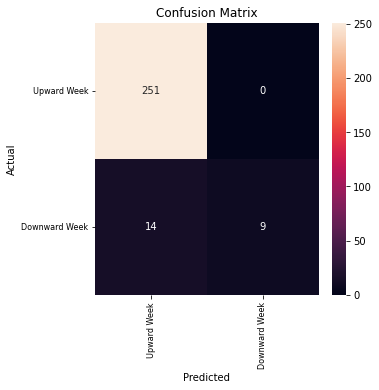

In [51]:
cm = confusion_matrix(actual, predicted)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['Upward Week','Downward Week'])
ax.yaxis.set_ticklabels(['Upward Week','Downward Week'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

# Forecasting

## Preparação

In [66]:
from datetime import datetime, timedelta, date

In [84]:
def generate_futures_dataframe(start_date: date, number_of_weeks: int):
    return pd.DataFrame([ start_date + timedelta(weeks = i) for i in range(number_of_weeks) ], columns=['DATE'])

generate_futures_dataframe(date.today(), 5)

,DATE
0,2022-02-10
1,2022-02-17
2,2022-02-24
3,2022-03-03
4,2022-03-10


In [85]:
df_future = generate_futures_dataframe(date.today(), 522)
print(df_future.shape)

(522, 1)


In [98]:
df_forecast = df.copy()
df_forecast

,date,bhkp_price,year,week,bhkp_delta,bhkp_delta_outcome,bhkp_variation,Outcome
0,2010-01-05,662.09,2010,1,NaN,21.66,NaN,21.66
1,2010-01-12,683.75,2010,2,21.66,2.10,0.032715,2.10
2,2010-01-19,685.85,2010,3,2.10,5.29,0.003071,5.29
3,2010-01-26,691.14,2010,4,5.29,3.79,0.007713,3.79
4,2010-02-02,694.93,2010,5,3.79,23.50,0.005484,23.50
...,...,...,...,...,...,...,...,...
623,2021-12-31,576.42,2021,52,5.69,11.76,0.009970,11.76
624,2022-01-07,588.18,2022,1,11.76,5.11,0.020402,5.11
625,2022-01-14,593.29,2022,2,5.11,7.15,0.008688,7.15
626,2022-01-21,600.44,2022,3,7.15,2.38,0.012051,2.38


In [99]:
df_forecast['event_pattern'], _  = pd.qcut(df['bhkp_variation'], 3, labels=["L", "M", "H"], retbins=True)
df_forecast['direction'] =  df_forecast['bhkp_delta_outcome'].apply(lambda x: 1 if x >0 else -1)
df_forecast

,date,bhkp_price,year,week,bhkp_delta,bhkp_delta_outcome,bhkp_variation,Outcome,event_pattern,direction
0,2010-01-05,662.09,2010,1,NaN,21.66,NaN,21.66,NaN,1
1,2010-01-12,683.75,2010,2,21.66,2.10,0.032715,2.10,H,1
2,2010-01-19,685.85,2010,3,2.10,5.29,0.003071,5.29,H,1
3,2010-01-26,691.14,2010,4,5.29,3.79,0.007713,3.79,H,1
4,2010-02-02,694.93,2010,5,3.79,23.50,0.005484,23.50,H,1
...,...,...,...,...,...,...,...,...,...,...
623,2021-12-31,576.42,2021,52,5.69,11.76,0.009970,11.76,H,1
624,2022-01-07,588.18,2022,1,11.76,5.11,0.020402,5.11,H,1
625,2022-01-14,593.29,2022,2,5.11,7.15,0.008688,7.15,H,1
626,2022-01-21,600.44,2022,3,7.15,2.38,0.012051,2.38,H,1


## Class to Number Prep (Normal) ??


In [102]:
pos_avg_change  = df_forecast[df_forecast['bhkp_variation'] > 0]['bhkp_variation'].describe()['mean']
pos_avg_std_dev = df_forecast[df_forecast['bhkp_variation'] > 0]['bhkp_variation'].describe()['std']

neg_avg_change  = df_forecast[df_forecast['bhkp_variation'] < 0]['bhkp_variation'].describe()['mean']
neg_avg_std_dev = df_forecast[df_forecast['bhkp_variation'] < 0]['bhkp_variation'].describe()['std']

print(f'pos_avg_change: {pos_avg_change} | pos_avg_std_dev: {pos_avg_std_dev}')
print(f'neg_avg_change: {neg_avg_change} | neg_avg_std_dev: {neg_avg_std_dev}') 

pos_avg_change: 0.007396944217685864 | pos_avg_std_dev: 0.012962102343764503
neg_avg_change: -0.007534008888572403 | neg_avg_std_dev: 0.01012791542584334


In [60]:
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([2, 6, 7, 8, 4])

uniao = np.setdiff1d(array1, array2, assume_unique=True)

print(uniao)

[1 3 5]


In [58]:
a

[1, 2, 3, 4]

In [59]:
a - [2,3]

TypeError: unsupported operand type(s) for -: 'list' and 'list'